In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv("prices[1].csv",header=0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [17]:
print(df.shape)

(851264, 7)


In [18]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [19]:
print(len(df.symbol.values))


851264


In [20]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [21]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [22]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [23]:
comp_info=pd.read_csv('securities[1].csv')
comp_info.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [24]:
comp_info["Ticker symbol"].nunique()

505

In [25]:
comp_info.loc[comp_info.Security.str.startswith("Face"),:]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",2013-12-23,1326801


In [26]:
comp_plot = comp_info.loc[
    (comp_info["Security"]=='Yahoo Inc.') 
    | (comp_info["Security"]=='Xerox Corp.') 
    | (comp_info["Security"]=='Microsoft Corp.') 
    | (comp_info["Security"]=='Adobe Systems Inc') 
    | (comp_info["Security"]=='Facebook') 
    | (comp_info["Security"]=='Goldman Sachs Group'),
    ["Ticker symbol"]
]["Ticker symbol"]

print(comp_plot)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


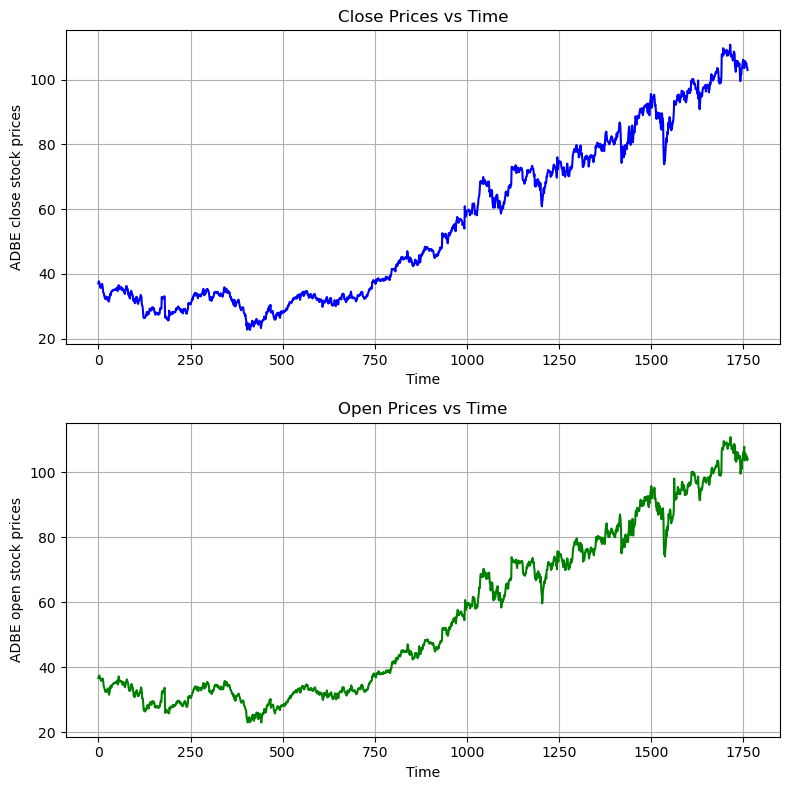

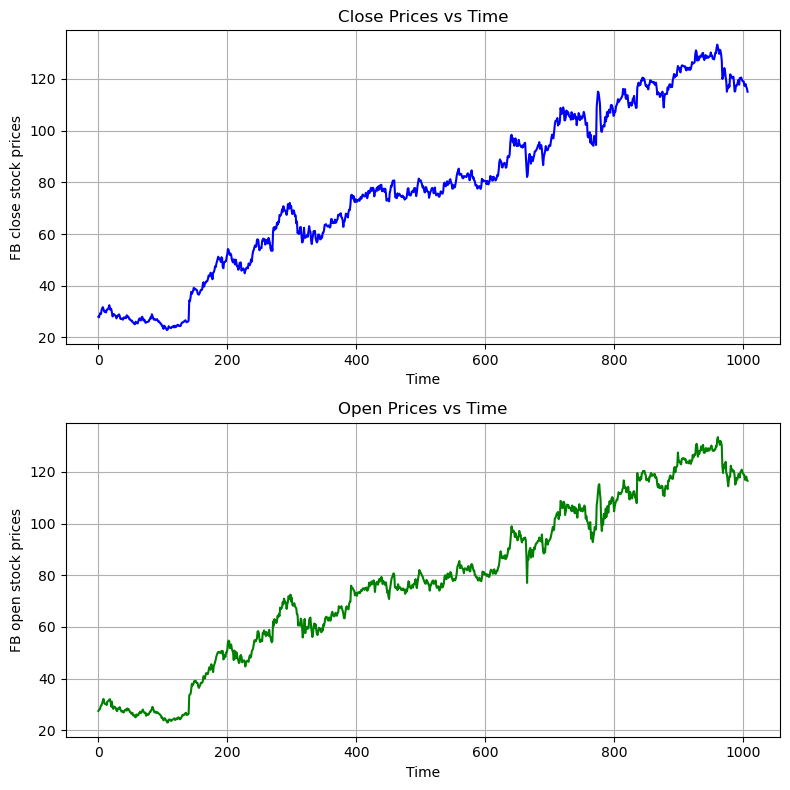

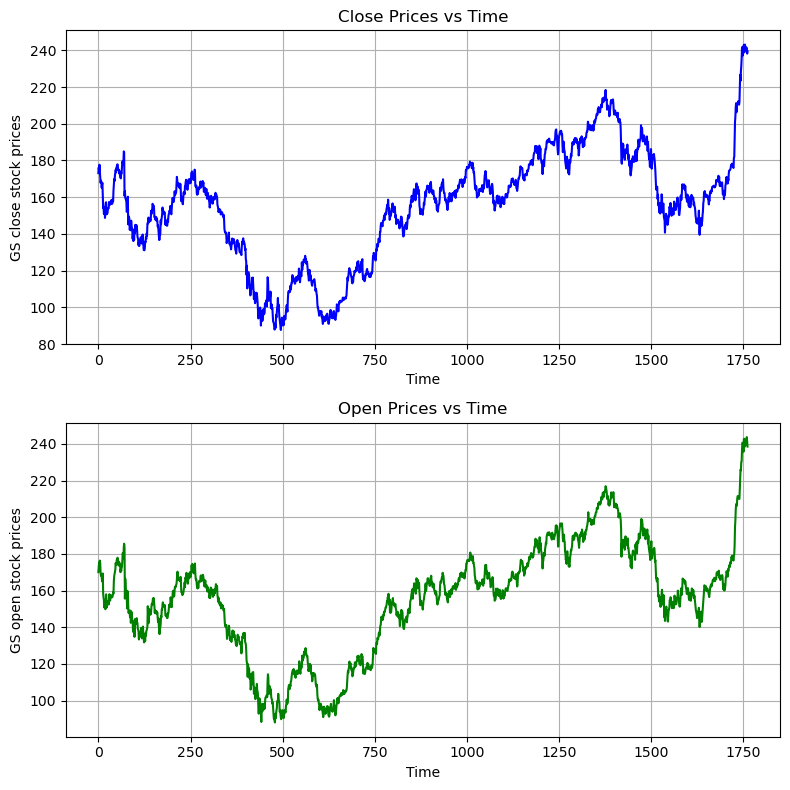

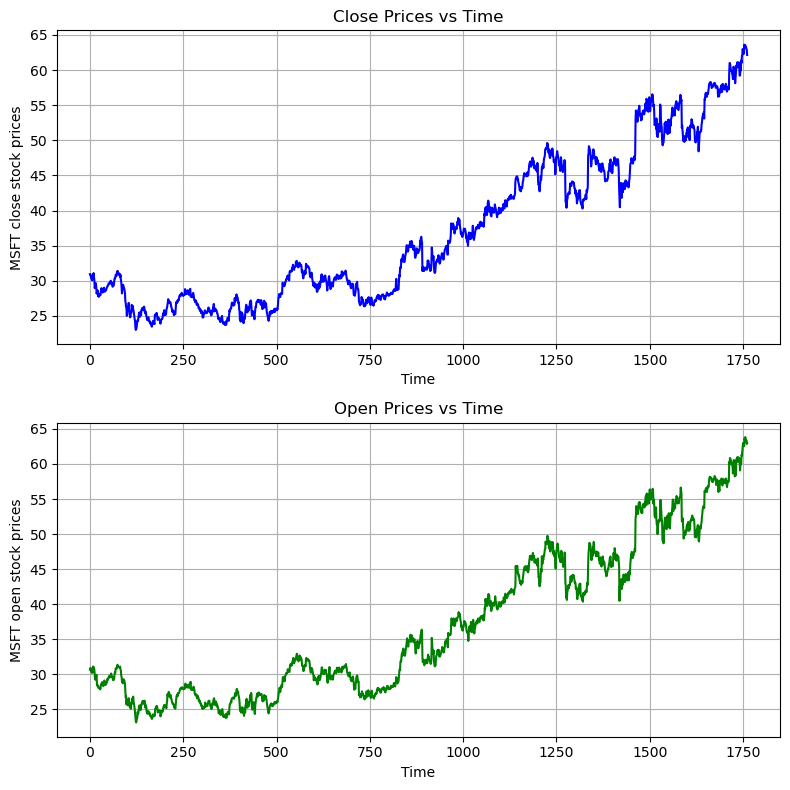

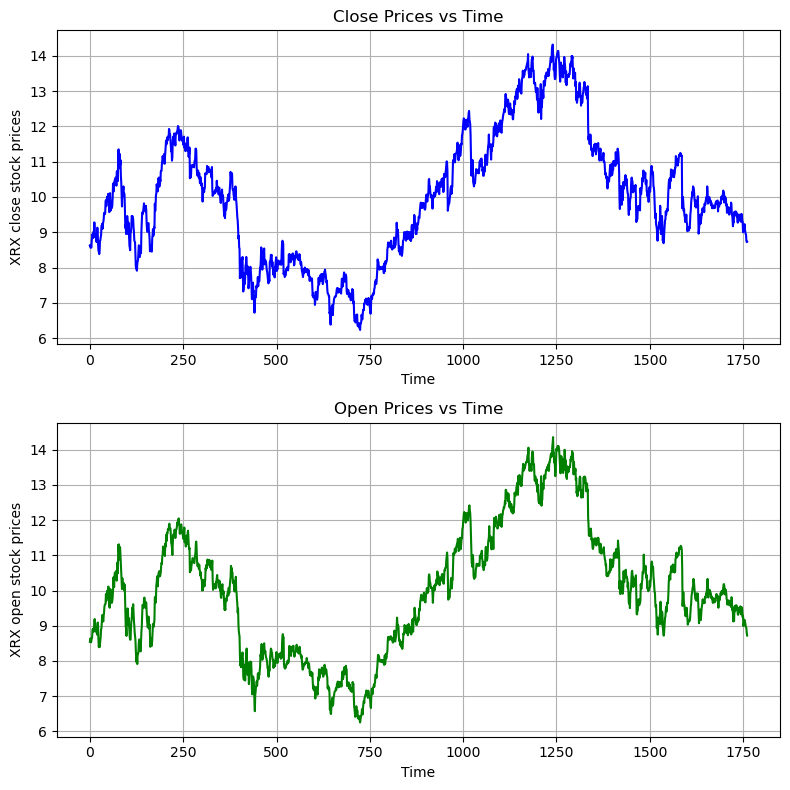

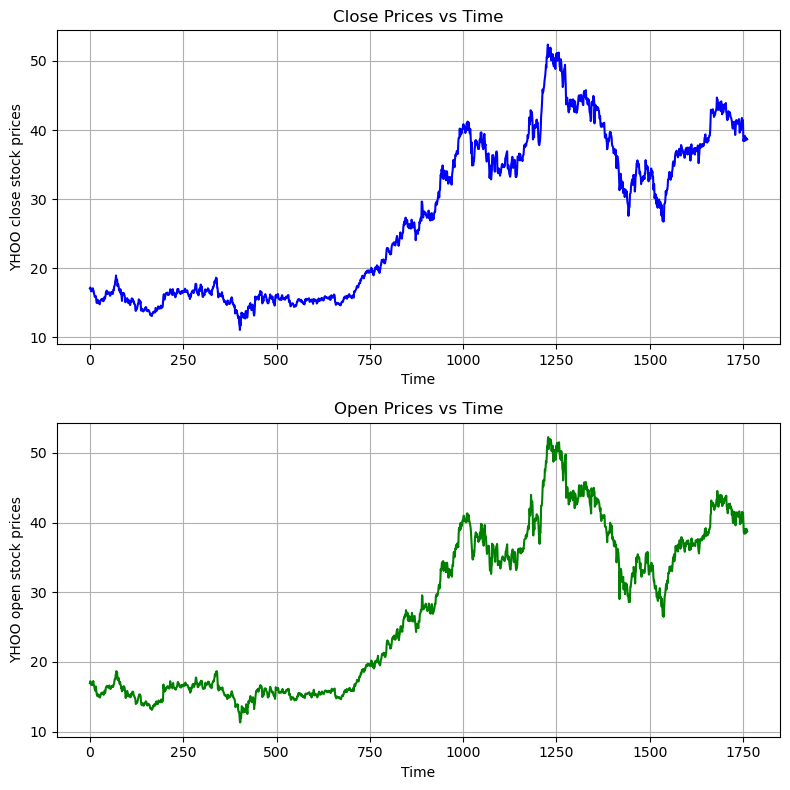

In [27]:
def plotter(code):
    global closing_stock, opening_stock
    
    company = df[df['symbol'] == code]
    
    # Create figure
    plt.figure(figsize=(8, 8))
    
    # Opening prices
    opening_stock = company['open'].values.astype('float32').reshape(-1, 1)
    plt.subplot(212)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + " open stock prices")
    plt.title('Open Prices vs Time')
    plt.plot(opening_stock, 'g')
    
    # Closing prices
    closing_stock = company['close'].values.astype('float32').reshape(-1, 1)
    plt.subplot(211)
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('Close Prices vs Time')
    plt.plot(closing_stock, 'b')
    
    # Fix overlap
    plt.tight_layout()
    plt.show()
for i in comp_plot:
    plotter(i)


In [28]:
closing_stock[:,0]

array([17.1 , 17.23, 17.17, ..., 38.73, 38.64, 38.67], dtype=float32)

In [29]:
stocks=closing_stock[:,0]
print(stocks)
stocks=stocks.reshape(len(stocks),1)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stocks=scaler.fit_transform(stocks)

In [31]:
train=int(len(stocks)*0.80)
test=len(stocks)-train


In [32]:
print(train,test)

1409 353


In [33]:
train=stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [34]:
test=stocks[len(train):]

In [35]:
train=train.reshape(len(train),1)
test=test.reshape(len(test),1)


In [36]:
print(train.shape, test.shape)

(1409, 1) (353, 1)


In [37]:
def process_data(data, n_features):
    dataX,dataY=[],[]
    for i in range(len(data)-n_features-1):
        a=data[i:(i+n_features),0]
        dataX.append(a)
        dataY.append(data[i+n_features,0])
    return np.array(dataX),np.array(dataY)

In [38]:
n_features=2
trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

In [39]:
print(trainX.shape , trainY.shape , testX.shape, testY.shape)

(1406, 2) (1406,) (350, 2) (350,)


In [40]:
trainX=trainX.reshape(trainX.shape[0],1,trainX.shape[1])
testX=testX.reshape(testX.shape[0],1,testX.shape[1])


In [41]:
import math
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam,SGD, RMSprop

In [42]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [43]:
filepath="stock_widths1.keras"
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
lr_reduce= ReduceLROnPlateau(monitor='val_loss',factor=0.1,epsilon=0.0001,patience=1,verbose=1)
checkpoint= ModelCheckpoint(filepath,monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [44]:
model = Sequential()
model.add(GRU(256,input_shape=(1 , n_features), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
print(model.summary())



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 256)              │         199,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [46]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005), metrics=['mean_squared_error'])


In [49]:
history=model.fit(trainX, trainY, epochs=100 , batch_size=128,
        callbacks=[checkpoint, lr_reduce], validation_data=(testX,testY))

Epoch 1/100
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1759 - mean_squared_error: 0.1759
Epoch 1: val_loss improved from None to 0.16630, saving model to stock_widths1.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1443 - mean_squared_error: 0.1443 - val_loss: 0.1663 - val_mean_squared_error: 0.1663 - learning_rate: 5.0000e-04
Epoch 2/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0641 - mean_squared_error: 0.0641 
Epoch 2: val_loss did not improve from 0.16630
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0015 - val_mean_squared_error: 0.0015 - learning_rate: 5.0000e-04
Epoch 3/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - mean_squared_error: 0.0233 
Epoch 3: val_loss did not improve from 0.16630

Epoch 3: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0018 - val_mean_squared_error:

In [50]:
pred=model.predict(testX)
pred= scaler.inverse_transform(pred)
pred[:10]

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 


array([[34.742226],
       [33.784946],
       [33.748005],
       [34.377735],
       [34.43913 ],
       [34.24122 ],
       [33.91396 ],
       [33.343296],
       [32.534126],
       [31.538904]], dtype=float32)

In [51]:
testY= testY.reshape(testY.shape[0],1)
testY= scaler.inverse_transform(testY)
testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red - Predicted Stock Prize , Blue - Actual Stock Prices


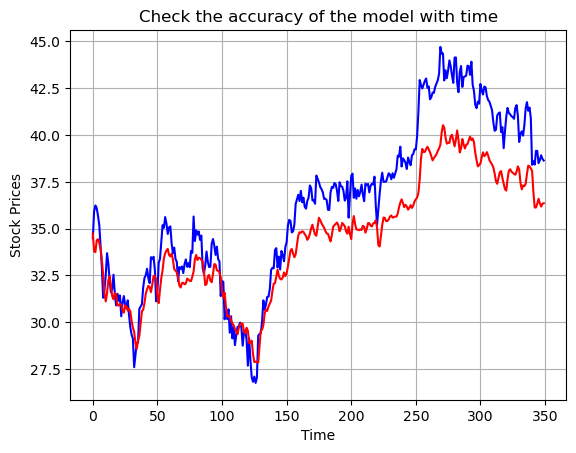

In [52]:
print("Red - Predicted Stock Prize , Blue - Actual Stock Prices")
plt.plot(testY,'b')
plt.plot(pred,'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [57]:
import numpy as np
import tensorflow as tf
import gradio as gr

# Load your model
model = tf.keras.models.load_model("stock_widths1.keras")

def predict(f1, f2):
    # reshape input to match (1, 1, 2)
    features = np.array([[[f1, f2]]], dtype=np.float32)
    try:
        prediction = model.predict(features)
        return float(prediction[0][0])
    except Exception as e:
        return f"Error: {str(e)}"

# Gradio interface with only 2 inputs
iface = gr.Interface(
    fn=predict,
    inputs=[gr.Number(label="Feature 1"),
            gr.Number(label="Feature 2")],
    outputs="text"
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [56]:
print(model.input_shape)

(None, 1, 2)
